<a href="https://colab.research.google.com/github/nitish6121999/US-HOME-PRICE-PREDICTION/blob/main/Home_LLC__Full_Assignmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - U.S Home Price Prediction



##### **Project Type**    - Supervised Machine Learning Regression
##### **Created by**      - Nitish N Naik

# **GitHub Link -**

https://github.com/nitish6121999/US-HOME-PRICE-PREDICTION

# **Problem Statement**



The aim of this study is to develop a robust predictive model for US home prices leveraging comprehensive datasets encompassing various economic, societal, and market-related factors. The objective is to accurately predict future home prices based on historical trends and the interplay of influential variables.

###Steps Involved:

**Data Collection**: Gather data from credible online sources encompassing US home pricing, real estate metrics, and a comprehensive set of factors known to influence housing markets.

**Dataset Merging and Understanding**: Consolidate and merge datasets to create a unified dataset. Understand the structure, contents, and relationships within the data.

**Focus on US Home Pricing and Real Estate**: Delve deep into the dynamics of US home pricing and real estate markets to comprehend patterns, trends, and influencing factors.

**Factor Identification and Understanding**: Identify, analyze, and understand the multitude of factors affecting home prices as potential independent variables.

**Exploratory Data Analysis (EDA)**: Perform exploratory data analysis to uncover correlations, trends, outliers, and patterns within the dataset. This step involves data cleaning, visualization, and statistical analysis.

**Model Development**: Utilize machine learning or statistical modeling techniques to build a predictive model. Train the model using historical data and the identified factors to predict future home prices accurately.

**Model Evaluation and Validation**: Validate the model's accuracy, robustness, and predictive capabilities using suitable metrics and validation techniques.


# Factors considered

House price Index 2001-2023

Average Sales Price of Houses Sold for the United States

Consumer Price Index for All Urban Consumers Housing in U.S. City

Average Economic Policy Uncertainty Index for United States (USEPUINDXD)

Government subsidies Federal Housing L312051A027NBEA

Homeownership Rate in the United States RHORUSQ156N

Interest Rates and Price Indexes 2001-2023.csv

Monthly Supply of New Houses in the United States

Mortgage Average in the United States MORTGAGE30US

Net housing value added Subsidies

Public Transportation in U.S. City Average

Real Median Household Income in the United States 2001-2022

Unemployeement rate 2002-2023

Working Age Population Aged 15-64

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
#path= '/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/House price Index 2001-2023.csv'

df_hpi=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/House price Index 2001-2023.csv',names=["DATE","Price-index"], skiprows = 1)
#df_cons_price_index = pd.read_csv("Construction_Price.csv", names = ["DATE", "Cons_Materials"], skiprows = 1)

In [5]:
#Changing dtype of date column
df_hpi["DATE"] = pd.to_datetime(df_hpi["DATE"])

#Selecting data post JUNE 2001
mask = df_hpi["DATE"] <= "2022-12-01"
df_hpi = df_hpi[mask]

#Resetting Index
df_hpi.reset_index(inplace = True)
df_hpi.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_hpi["Year"] = pd.DatetimeIndex(df_hpi["DATE"]).year
df_hpi["Month"] = pd.DatetimeIndex(df_hpi["DATE"]).month
print(df_hpi.shape)
df_hpi.head()

(252, 4)


DATE  Price-index  Year  Month
0 2002-01-01      117.144  2002      1
1 2002-01-02      117.844  2002      1
2 2002-01-03      118.687  2002      1
3 2002-01-04      119.610  2002      1
4 2002-01-05      120.724  2002      1

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df_hpi.shape

(252, 4)

### Dataset Information

###Unemployeement rate

In [7]:
# importing Dataset from different sources
df_unem=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Unemployeement rate 2002-2023.csv', encoding='unicode_escape', parse_dates=[0])
print(df_unem.shape)

df_unem.head()

(262, 2)


DATE  UNRATE
0 2002-01-01     5.7
1 2002-02-01     5.7
2 2002-03-01     5.7
3 2002-04-01     5.9
4 2002-05-01     5.8


Average Sales Price of Houses Sold for the United States


In [8]:
df_hs=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Average Sales Price of Houses Sold for the United States ASPUS.csv',  names = ["DATE", "avg_sales_price"], skiprows = 1)
print(df_hs.shape)

df_hs.head()

(91, 2)


DATE  avg_sales_price
0  2001-01-01         211000.0
1  2001-04-01         211200.0
2  2001-07-01         207800.0
3  2001-10-01         214200.0
4  2002-01-01         227600.0


Consumer Price Index for All Urban Consumers Housing in U.S. City



In [9]:
df_cpi=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Consumer Price Index for All Urban Consumers Housing in U.S. City Average 2001-2023.csv', names = ["DATE", "con_price_index"], skiprows = 1)
print(df_cpi.shape)

df_cpi.head()

(275, 2)


DATE  con_price_index
0  2001-01-01            174.1
1  2001-02-01            174.7
2  2001-03-01            175.4
3  2001-04-01            175.4
4  2001-05-01            175.9

Average Economic Policy Uncertainty Index for United States (USEPUINDXD)



In [10]:
df_ep=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Economic Policy Uncertainty Index for United States (USEPUINDXD).csv', names = ["DATE", "avg_Eco_policy"], skiprows = 1)
print(df_ep.shape)

df_ep.head()

(276, 2)


DATE  avg_Eco_policy
0  2001-01-01      123.213871
1  2001-02-01      122.261071
2  2001-03-01      124.462258
3  2001-04-01      105.174333
4  2001-05-01       96.311935

Government subsidies Federal Housing L312051A027NBEA



In [11]:
df_gs=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Government subsidies Federal Housing L312051A027NBEA.csv', names = ["DATE", "govt_subsidies"], skiprows = 1)
print(df_gs.shape)

df_gs.head()

(22, 2)


DATE  govt_subsidies
0  2001-01-01          20.573
1  2002-01-01          24.183
2  2003-01-01          25.930
3  2004-01-01          27.201
4  2005-01-01          27.651

Homeownership Rate in the United States RHORUSQ156N



In [12]:
df_ho=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Homeownership Rate in the United States RHORUSQ156N.csv', names = ["DATE", "homeownership_rate"], skiprows = 1)
print(df_ho.shape)

df_ho.head()

(91, 2)


DATE  homeownership_rate
0  2001-01-01                67.5
1  2001-04-01                67.7
2  2001-07-01                68.1
3  2001-10-01                68.0
4  2002-01-01                67.8

Interest Rates and Price Indexes 2001-2023.csv



In [13]:
df_ir=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Interest Rates and Price Indexes 2001-2023.csv', names = ["DATE", "Interest_rate"], skiprows = 1)
print(df_ir.shape)

df_ir.head()

(87, 2)


DATE  Interest_rate
0  01-01-2002           6972
1  01-04-2002           6813
2  01-07-2002           6289
3  01-10-2002           6075
4  01-01-2003           5841

Monthly Supply of New Houses in the United States


In [14]:
df_ms=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Monthly Supply of New Houses in the United States.csv', names = ["DATE", "monthly_new_house"], skiprows = 1)
print(df_ms.shape)

df_ms.head()

(275, 2)


DATE  monthly_new_house
0  2001-01-01                3.8
1  2001-02-01                3.7
2  2001-03-01                3.8
3  2001-04-01                3.9
4  2001-05-01                4.0


Mortgage Average in the United States MORTGAGE30US


In [15]:
df_ma=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/mortgage_rate.csv', names = ["DATE", "mortgage"], skiprows = 1)
print(df_ma.shape)

df_ma.head()

(22, 2)


DATE  mortgage
0  2002      6.54
1  2003      5.83
2  2004      5.84
3  2005      5.87
4  2006      6.41


Net housing value added Subsidies


In [16]:
df_nhv=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Net housing value added Subsidies.csv', names = ["DATE", "net_housing_value"], skiprows = 1)
print(df_nhv.shape)

df_nhv.head()

(22, 2)


DATE  net_housing_value
0  2001-01-01             21.094
1  2002-01-01             24.429
2  2003-01-01             26.503
3  2004-01-01             28.585
4  2005-01-01             31.688


Public Transportation in U.S. City Average


In [17]:
df_pt=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Public Transportation in U.S. City Average.csv', names = ["DATE", "transportation"], skiprows = 1)
print(df_pt.shape)

df_pt.head()

(275, 2)


DATE  transportation
0  2001-01-01           210.2
1  2001-02-01           212.1
2  2001-03-01           210.0
3  2001-04-01           208.3
4  2001-05-01           209.3


Real Median Household Income in the United States 2001-2022



In [18]:
df_hi=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Real Median Household Income in the United States 2001-2022.csv', names = ["DATE", "household_income"], skiprows = 1)
print(df_hi.shape)

df_hi.head()

(22, 2)


DATE  household_income
0  2001-01-01             66360
1  2002-01-01             65820
2  2003-01-01             65860
3  2004-01-01             65760
4  2005-01-01             66780

Working Age Population Aged 15-64

In [19]:
df_wp=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Working Age Population Aged 15-64.csv', names = ["DATE", "population"], skiprows = 1)

print(df_wp.shape)

df_wp.head()

(274, 2)


DATE    population
0  2001-01-01  1.804166e+08
1  2001-02-01  1.805777e+08
2  2001-03-01  1.806361e+08
3  2001-04-01  1.809055e+08
4  2001-05-01  1.810146e+08

Fedral funds effective rate

In [20]:
df_ff=pd.read_csv('/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/Federal Funds Effective Rate FEDFUNDS.csv',  names = ["DATE", "fedral_rate"], skiprows = 1)
print(df_ff.shape)

df_ff.head()

(264, 2)


DATE  fedral_rate
0  2001-01-01         5.98
1  2001-02-01         5.49
2  2001-03-01         5.31
3  2001-04-01         4.80
4  2001-05-01         4.21

GDP

In [21]:
df_gdp=pd.read_csv("/content/drive/MyDrive/Access file/Extras/HOME LLC/Dataset/GDP.csv", names = ["DATE", "Per_Capita_GDP"], skiprows = 1)
print(df_gdp.shape)

df_gdp.head()

(91, 2)


DATE  Per_Capita_GDP
0  2001-01-01       10470.231
1  2001-04-01       10599.000
2  2001-07-01       10598.020
3  2001-10-01       10660.465
4  2002-01-01       10783.500

df_bymonth = [df_hpi, df_unem, df_cpi, df_ep,df_ms,df_pt,df_wp,df_ff]

In [22]:
df_bymonth = [df_ep,df_unem,df_cpi,df_ms,df_pt,df_wp,df_ff]
for df1 in df_bymonth:
  df_hpi = pd.concat([df_hpi,df1],axis=1)
print(df_hpi.shape)
df_hpi.head()

(276, 18)


DATE  Price-index    Year  Month        DATE  avg_Eco_policy  \
0 2002-01-01      117.144  2002.0    1.0  2001-01-01      123.213871   
1 2002-01-02      117.844  2002.0    1.0  2001-02-01      122.261071   
2 2002-01-03      118.687  2002.0    1.0  2001-03-01      124.462258   
3 2002-01-04      119.610  2002.0    1.0  2001-04-01      105.174333   
4 2002-01-05      120.724  2002.0    1.0  2001-05-01       96.311935   

        DATE  UNRATE        DATE  con_price_index        DATE  \
0 2002-01-01     5.7  2001-01-01            174.1  2001-01-01   
1 2002-02-01     5.7  2001-02-01            174.7  2001-02-01   
2 2002-03-01     5.7  2001-03-01            175.4  2001-03-01   
3 2002-04-01     5.9  2001-04-01            175.4  2001-04-01   
4 2002-05-01     5.8  2001-05-01            175.9  2001-05-01   

   monthly_new_house        DATE  transportation        DATE    population  \
0                3.8  2001-01-01           210.2  2001-01-01  1.804166e+08   
1                3.7  2001-02-01           212.1  2001-02-01  1.805777e+08   
2                3.8  2001-03-01           210.0  2001-03-01  1.806361e+08   
3                3.9  2001-04-01           208.3  2001-04-01  1.809055e+08   
4                4.0  2001-05-01           209.3  2001-05-01  1.810146e+08   

         DATE  fedral_rate  
0  2001-01-01         5.98  
1  2001-02-01         5.49  
2  2001-03-01         5.31  
3  2001-04-01         4.80  
4  2001-05-01         4.21

In [23]:
df_hpi.isnull().sum()

DATE                 24
Price-index          24
Year                 24
Month                24
DATE                  0
avg_Eco_policy        0
DATE                 14
UNRATE               14
DATE                  1
con_price_index       1
DATE                  1
monthly_new_house     1
DATE                  1
transportation        1
DATE                  2
population            2
DATE                 12
fedral_rate          12
dtype: int64

In [24]:
df_hpi.dropna(inplace=True)

In [25]:
df_hpi.head()

DATE  Price-index    Year  Month        DATE  avg_Eco_policy  \
0 2002-01-01      117.144  2002.0    1.0  2001-01-01      123.213871   
1 2002-01-02      117.844  2002.0    1.0  2001-02-01      122.261071   
2 2002-01-03      118.687  2002.0    1.0  2001-03-01      124.462258   
3 2002-01-04      119.610  2002.0    1.0  2001-04-01      105.174333   
4 2002-01-05      120.724  2002.0    1.0  2001-05-01       96.311935   

        DATE  UNRATE        DATE  con_price_index        DATE  \
0 2002-01-01     5.7  2001-01-01            174.1  2001-01-01   
1 2002-02-01     5.7  2001-02-01            174.7  2001-02-01   
2 2002-03-01     5.7  2001-03-01            175.4  2001-03-01   
3 2002-04-01     5.9  2001-04-01            175.4  2001-04-01   
4 2002-05-01     5.8  2001-05-01            175.9  2001-05-01   

   monthly_new_house        DATE  transportation        DATE    population  \
0                3.8  2001-01-01           210.2  2001-01-01  1.804166e+08   
1                3.7  2001-02-01           212.1  2001-02-01  1.805777e+08   
2                3.8  2001-03-01           210.0  2001-03-01  1.806361e+08   
3                3.9  2001-04-01           208.3  2001-04-01  1.809055e+08   
4                4.0  2001-05-01           209.3  2001-05-01  1.810146e+08   

         DATE  fedral_rate  
0  2001-01-01         5.98  
1  2001-02-01         5.49  
2  2001-03-01         5.31  
3  2001-04-01         4.80  
4  2001-05-01         4.21

In [26]:
date_columns = [col for col in df_hpi.columns if col == 'DATE']
columns_to_drop = date_columns[1:]

# Drop columns except the first occurrence of 'DATE'
df_hpi.drop(columns=columns_to_drop, inplace=True)

In [27]:
df_hpi.shape

(252, 10)

In [28]:
df_hpi.head()

Price-index    Year  Month  avg_Eco_policy  UNRATE  con_price_index  \
0      117.144  2002.0    1.0      123.213871     5.7            174.1   
1      117.844  2002.0    1.0      122.261071     5.7            174.7   
2      118.687  2002.0    1.0      124.462258     5.7            175.4   
3      119.610  2002.0    1.0      105.174333     5.9            175.4   
4      120.724  2002.0    1.0       96.311935     5.8            175.9   

   monthly_new_house  transportation    population  fedral_rate  
0                3.8           210.2  1.804166e+08         5.98  
1                3.7           212.1  1.805777e+08         5.49  
2                3.8           210.0  1.806361e+08         5.31  
3                3.9           208.3  1.809055e+08         4.80  
4                4.0           209.3  1.810146e+08         4.21

In [29]:
df_bymonth = [df_gs,df_ma,df_nhv,df_hi,df_hs,df_ho,df_gdp,df_ir]
for df1 in df_bymonth:
  df_hpi = pd.concat([df_hpi,df1],axis=1)
print(df_hpi.shape)
df_hpi.head()

(252, 26)


Price-index    Year  Month  avg_Eco_policy  UNRATE  con_price_index  \
0      117.144  2002.0    1.0      123.213871     5.7            174.1   
1      117.844  2002.0    1.0      122.261071     5.7            174.7   
2      118.687  2002.0    1.0      124.462258     5.7            175.4   
3      119.610  2002.0    1.0      105.174333     5.9            175.4   
4      120.724  2002.0    1.0       96.311935     5.8            175.9   

   monthly_new_house  transportation    population  fedral_rate  ...  \
0                3.8           210.2  1.804166e+08         5.98  ...   
1                3.7           212.1  1.805777e+08         5.49  ...   
2                3.8           210.0  1.806361e+08         5.31  ...   
3                3.9           208.3  1.809055e+08         4.80  ...   
4                4.0           209.3  1.810146e+08         4.21  ...   

         DATE  household_income        DATE  avg_sales_price        DATE  \
0  2001-01-01           66360.0  2001-01-01         211000.0  2001-01-01   
1  2002-01-01           65820.0  2001-04-01         211200.0  2001-04-01   
2  2003-01-01           65860.0  2001-07-01         207800.0  2001-07-01   
3  2004-01-01           65760.0  2001-10-01         214200.0  2001-10-01   
4  2005-01-01           66780.0  2002-01-01         227600.0  2002-01-01   

   homeownership_rate        DATE  Per_Capita_GDP        DATE  Interest_rate  
0                67.5  2001-01-01       10470.231  01-01-2002         6972.0  
1                67.7  2001-04-01       10599.000  01-04-2002         6813.0  
2                68.1  2001-07-01       10598.020  01-07-2002         6289.0  
3                68.0  2001-10-01       10660.465  01-10-2002         6075.0  
4                67.8  2002-01-01       10783.500  01-01-2003         5841.0  

[5 rows x 26 columns]

In [30]:
df_hpi.isnull().sum()

Price-index             0
Year                    0
Month                   0
avg_Eco_policy          0
UNRATE                  0
con_price_index         0
monthly_new_house       0
transportation          0
population              0
fedral_rate             0
DATE                  230
govt_subsidies        230
DATE                  230
mortgage              230
DATE                  230
net_housing_value     230
DATE                  230
household_income      230
DATE                  161
avg_sales_price       161
DATE                  161
homeownership_rate    161
DATE                  161
Per_Capita_GDP        161
DATE                  165
Interest_rate         165
dtype: int64

In [31]:
date_columns = [col for col in df_hpi.columns if col == 'DATE']
columns_to_drop = date_columns[1:]

# Drop columns except the first occurrence of 'DATE'
df_hpi.drop(columns=columns_to_drop, inplace=True)

In [32]:
df_hpi.isnull().sum()

Price-index             0
Year                    0
Month                   0
avg_Eco_policy          0
UNRATE                  0
con_price_index         0
monthly_new_house       0
transportation          0
population              0
fedral_rate             0
govt_subsidies        230
mortgage              230
net_housing_value     230
household_income      230
avg_sales_price       161
homeownership_rate    161
Per_Capita_GDP        161
Interest_rate         165
dtype: int64

Due the Data present in Quarterly and yealry , to fill out the missing values I have used linear interpolate method

###Yearly Data Present
Govt_subsidies        230

mortgage              230

net_housing_value     230

household_income      230

###Quarterly Data present

avg_sales_price       161

homeownership_rate    161

Per_Capita_GDP        161

Interest_rate         165

In [33]:
columns_to_interpolate = ['govt_subsidies', 'mortgage', 'net_housing_value', 'household_income',
                          'avg_sales_price', 'homeownership_rate', 'Per_Capita_GDP', 'Interest_rate']

# Interpolate missing values in specified columns
df_hpi[columns_to_interpolate] = df_hpi[columns_to_interpolate].interpolate()


In [34]:
df_hpi.shape

(252, 18)

In [35]:
df_hpi.isnull().sum()

Price-index           0
Year                  0
Month                 0
avg_Eco_policy        0
UNRATE                0
con_price_index       0
monthly_new_house     0
transportation        0
population            0
fedral_rate           0
govt_subsidies        0
mortgage              0
net_housing_value     0
household_income      0
avg_sales_price       0
homeownership_rate    0
Per_Capita_GDP        0
Interest_rate         0
dtype: int64

In [36]:
df_hpi.drop(columns='Month', inplace=True)

In [37]:
df_hpi.to_csv("merged_dataset.csv")

In [38]:
df_hpi.head(10)

Price-index    Year  avg_Eco_policy  UNRATE  con_price_index  \
0      117.144  2002.0      123.213871     5.7            174.1   
1      117.844  2002.0      122.261071     5.7            174.7   
2      118.687  2002.0      124.462258     5.7            175.4   
3      119.610  2002.0      105.174333     5.9            175.4   
4      120.724  2002.0       96.311935     5.8            175.9   
5      121.813  2002.0       70.574333     5.8            177.3   
6      122.888  2002.0       91.896452     5.8            177.6   
7      123.830  2002.0       80.837419     5.7            178.0   
8      124.780  2002.0      234.574333     5.7            177.4   
9      125.734  2002.0      236.406129     5.7            176.7   

   monthly_new_house  transportation    population  fedral_rate  \
0                3.8           210.2  1.804166e+08         5.98   
1                3.7           212.1  1.805777e+08         5.49   
2                3.8           210.0  1.806361e+08         5.31   
3                3.9           208.3  1.809055e+08         4.80   
4                4.0           209.3  1.810146e+08         4.21   
5                4.2           216.3  1.813565e+08         3.97   
6                4.2           216.1  1.816143e+08         3.77   
7                4.4           213.7  1.818285e+08         3.65   
8                4.4           212.7  1.820565e+08         3.07   
9                4.3           209.1  1.822366e+08         2.49   

   govt_subsidies  mortgage  net_housing_value  household_income  \
0          20.573      6.54             21.094           66360.0   
1          24.183      5.83             24.429           65820.0   
2          25.930      5.84             26.503           65860.0   
3          27.201      5.87             28.585           65760.0   
4          27.651      6.41             31.688           66780.0   
5          28.604      6.34             30.683           67520.0   
6          29.512      6.03             37.448           68610.0   
7          29.876      5.04             33.461           66280.0   
8          32.883      4.69             34.860           65850.0   
9          32.669      4.45             34.177           64300.0   

   avg_sales_price  homeownership_rate  Per_Capita_GDP  Interest_rate  
0         211000.0                67.5       10470.231         6972.0  
1         211200.0                67.7       10599.000         6813.0  
2         207800.0                68.1       10598.020         6289.0  
3         214200.0                68.0       10660.465         6075.0  
4         227600.0                67.8       10783.500         5841.0  
5         227600.0                67.6       10887.460         5507.0  
6         219100.0                68.0       10984.040         6034.0  
7         232500.0                68.3       11061.433         5919.0  
8         233100.0                68.0       11174.129         5592.0  
9         241000.0                68.0       11312.766         6159.0

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

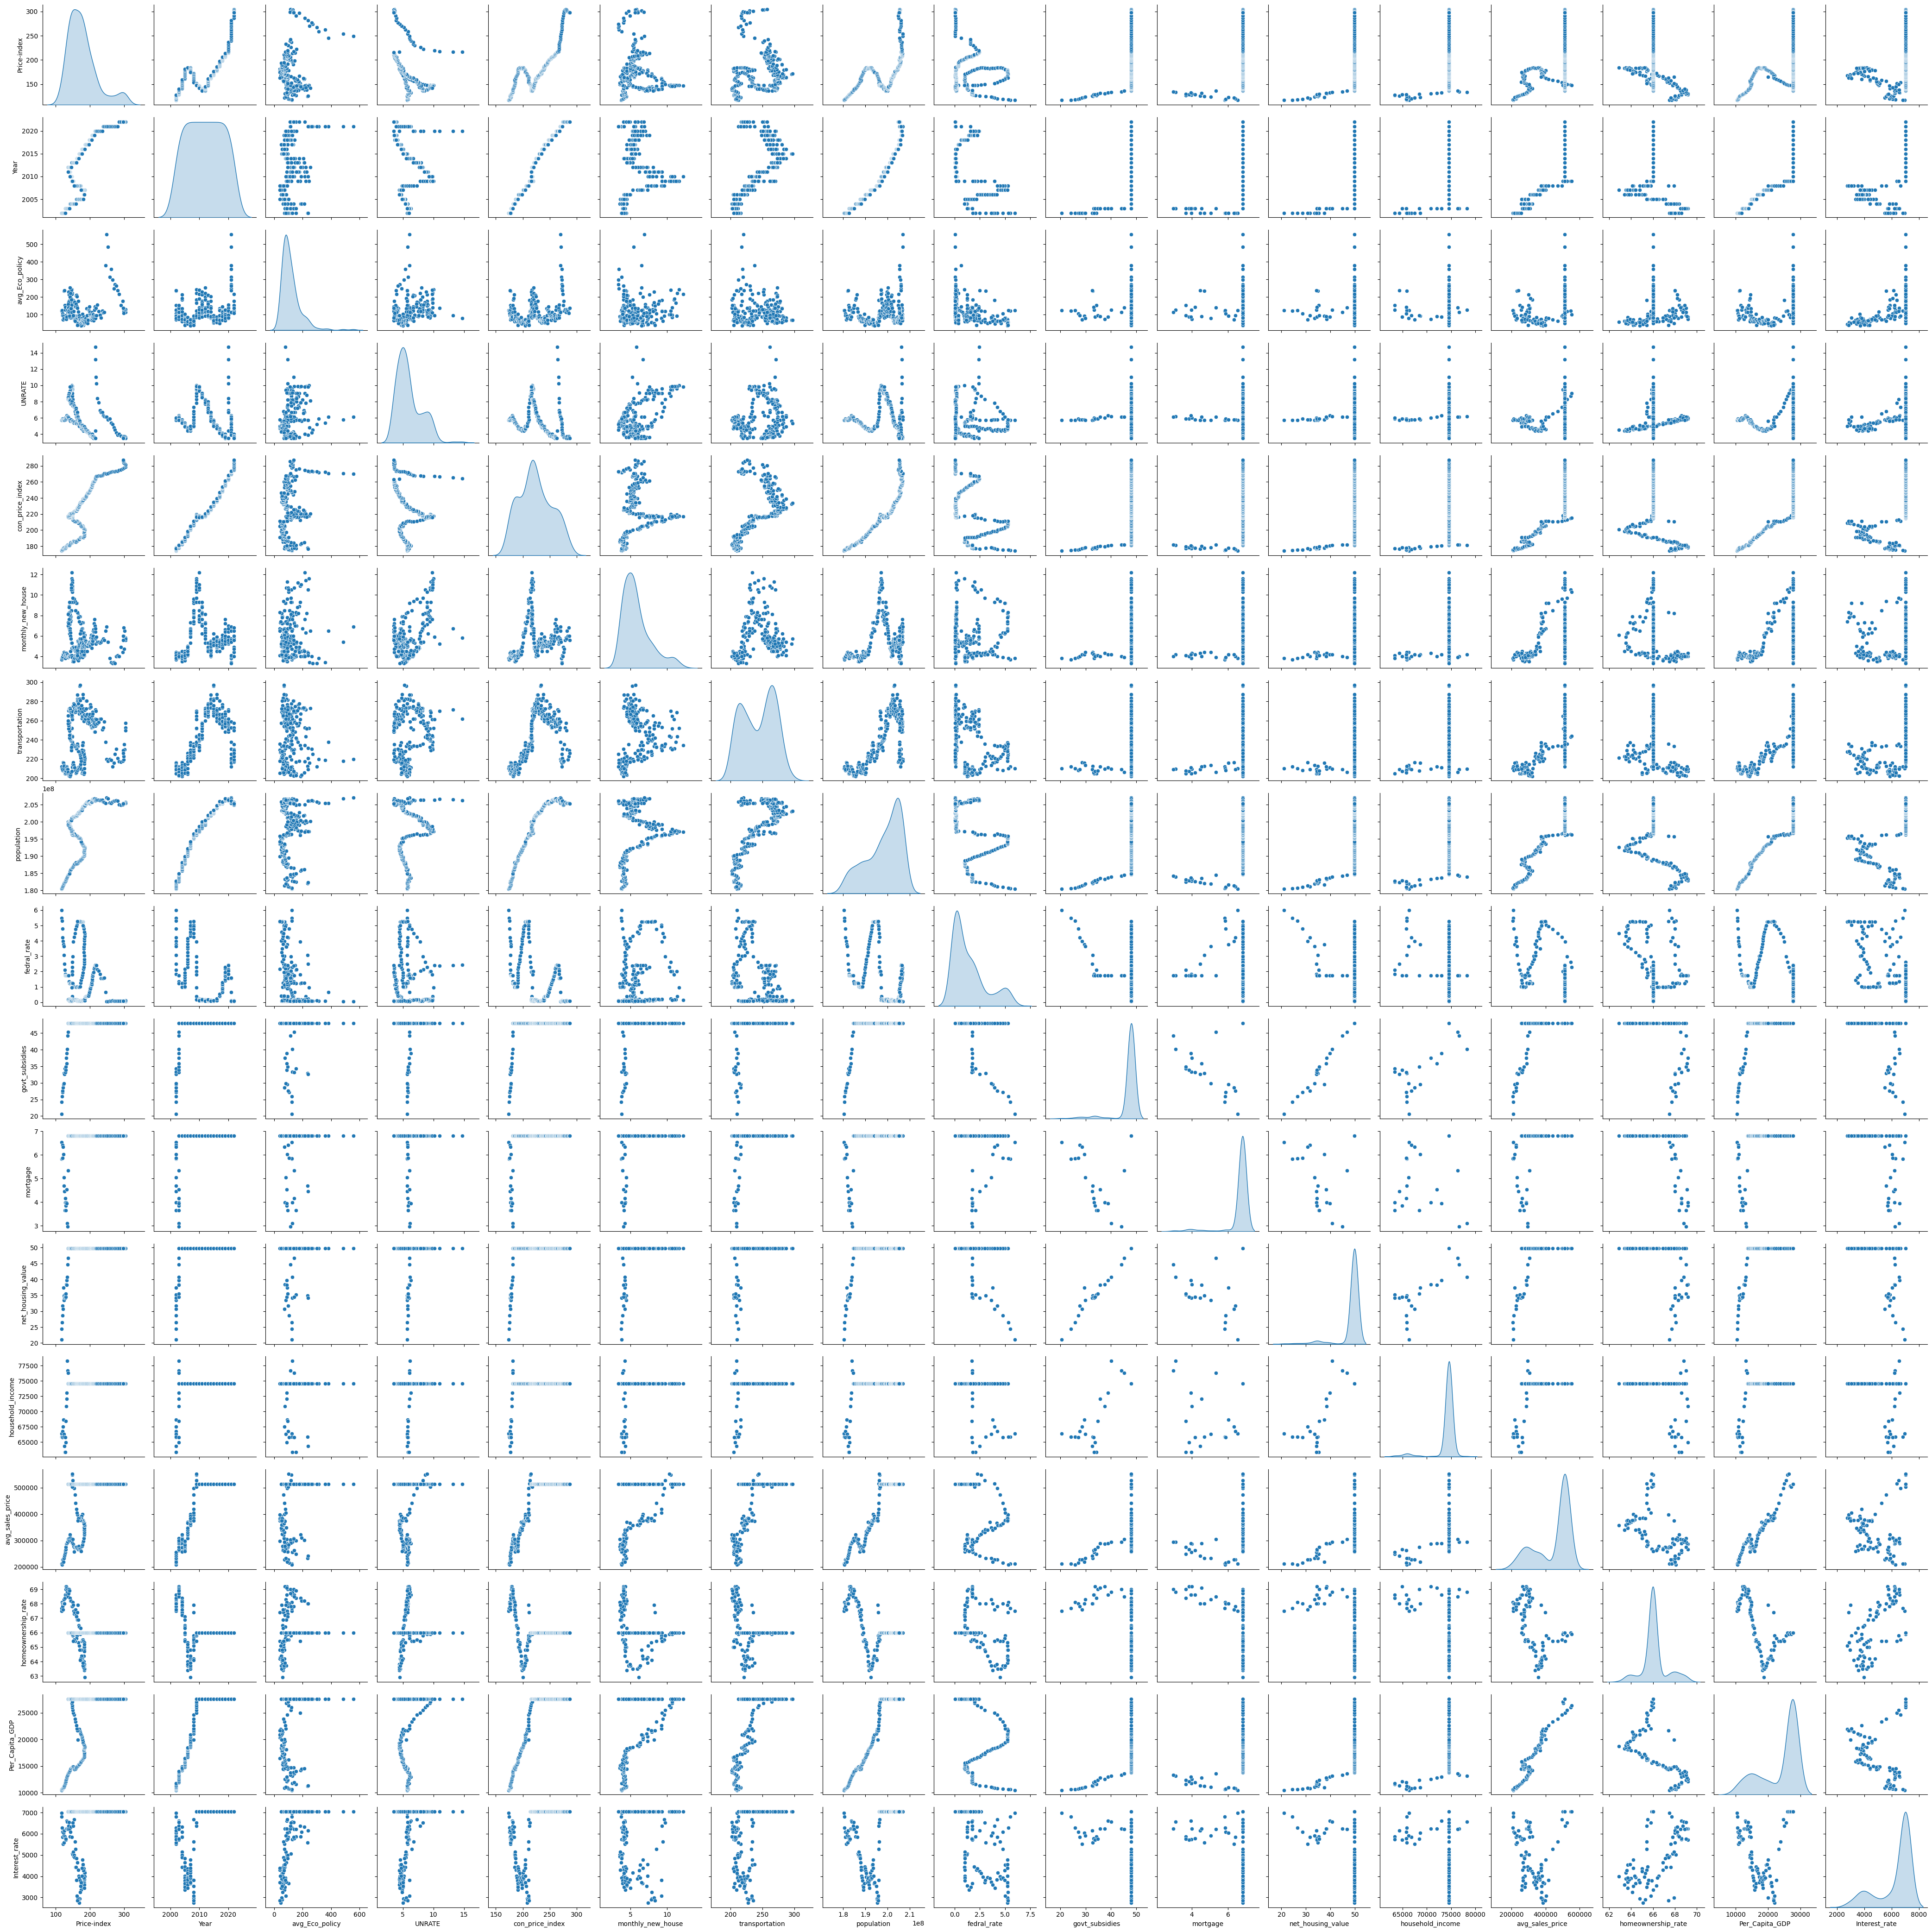

In [39]:
sns.pairplot(df_hpi, diag_kind= 'kde')

1. Why did you pick the specific chart?

WE can understand how data is distributed across the dataset

In [40]:
numeric_col= df_hpi.describe().columns

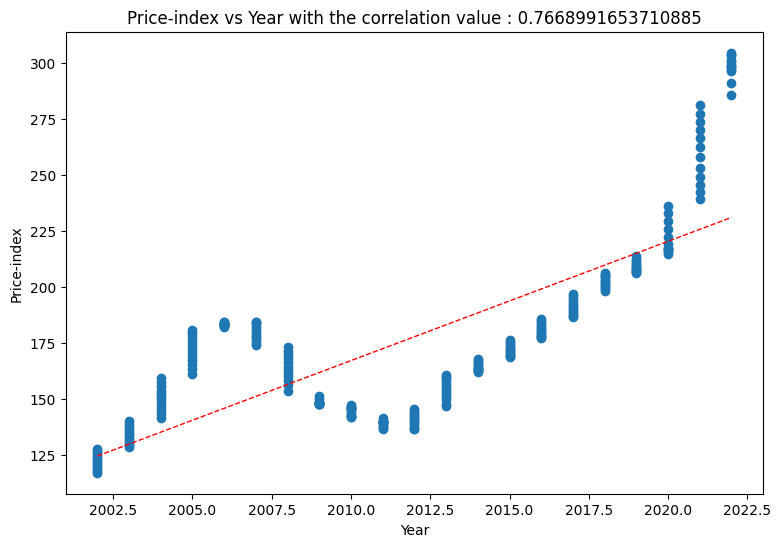

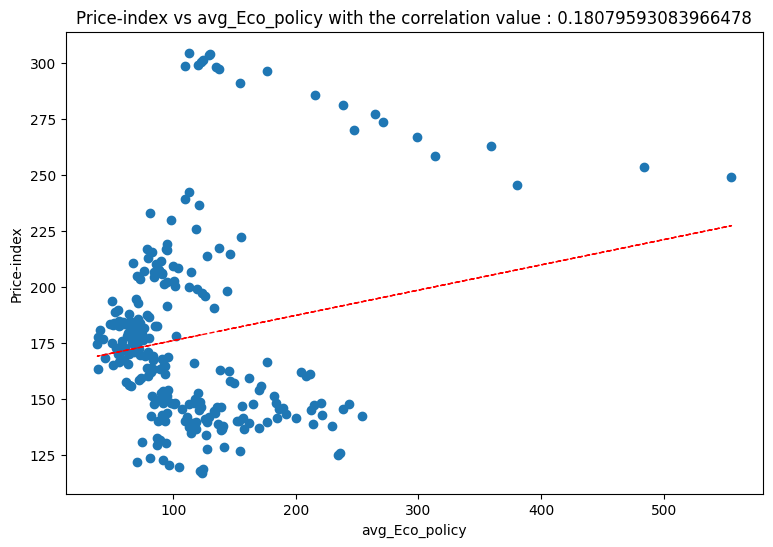

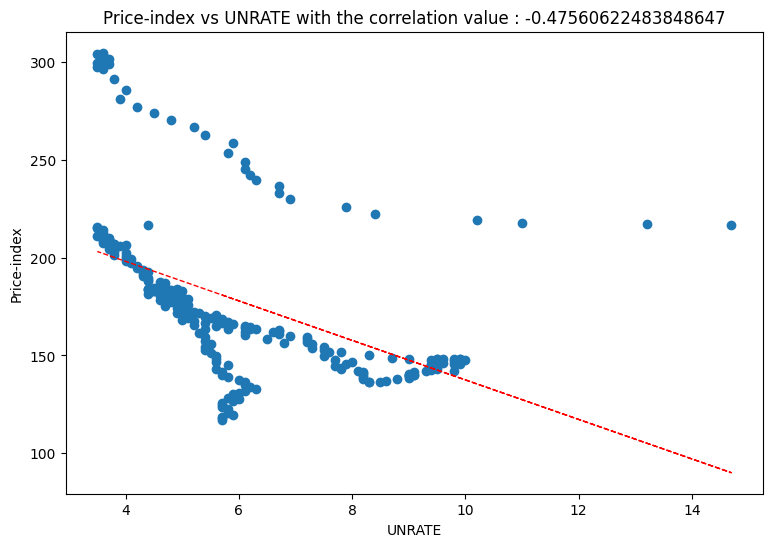

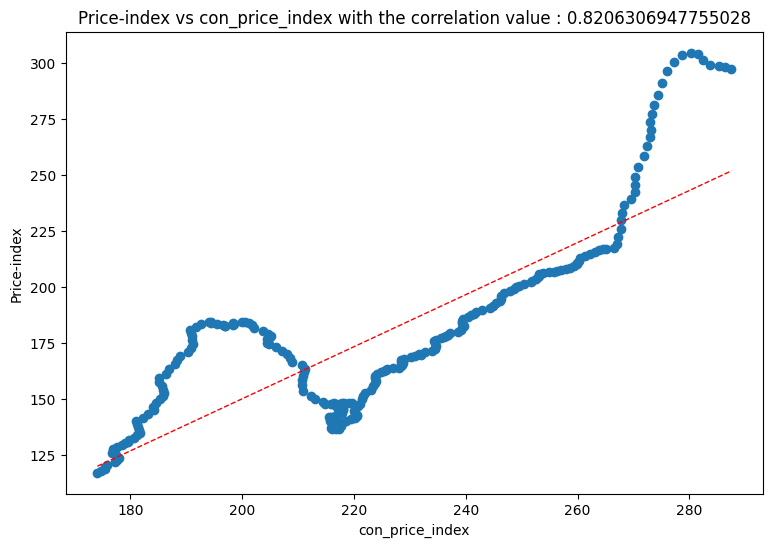

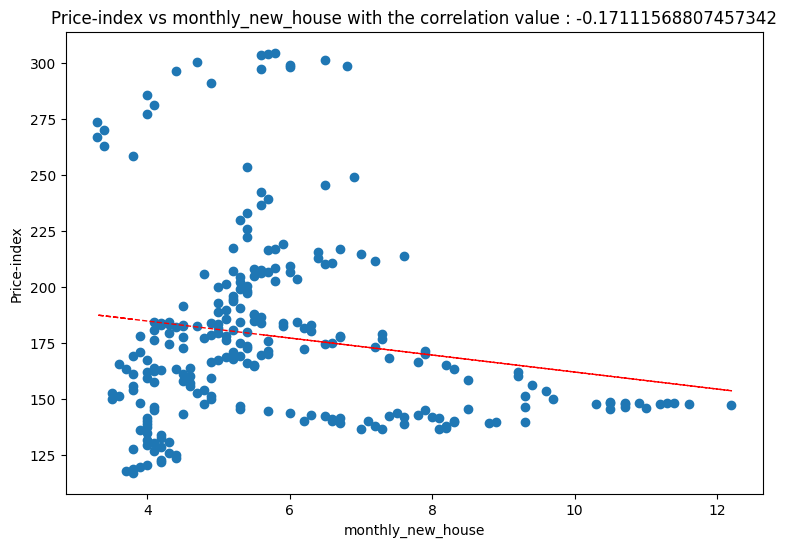

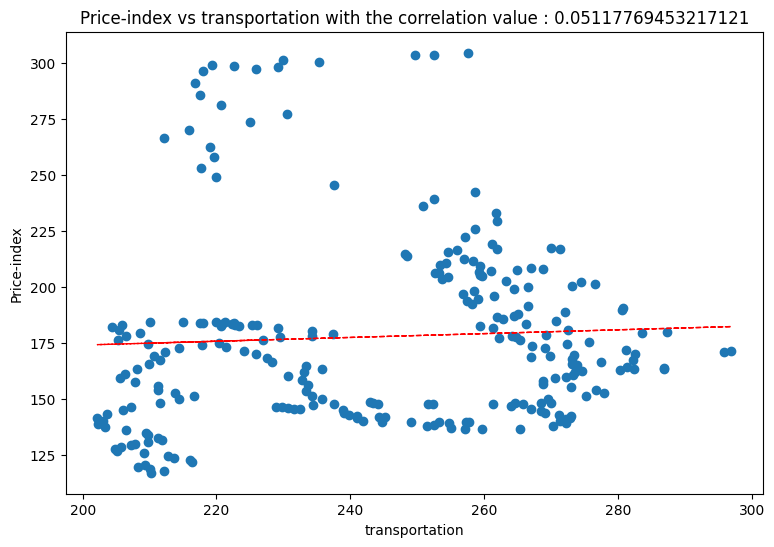

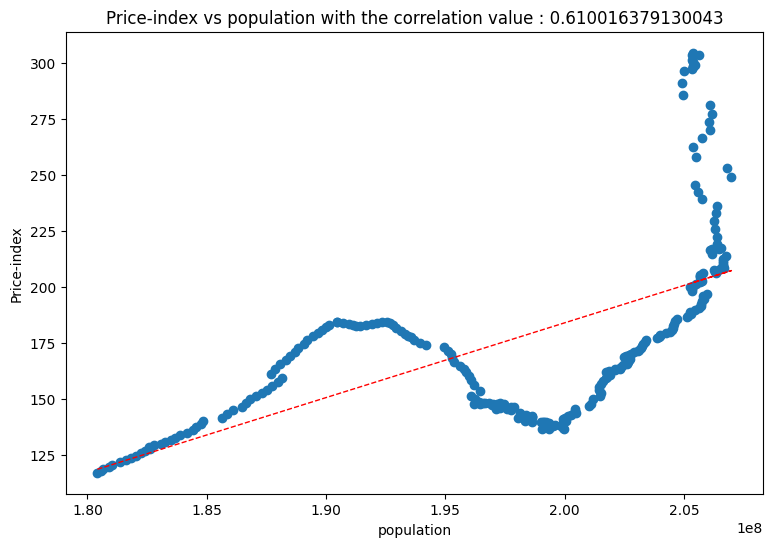

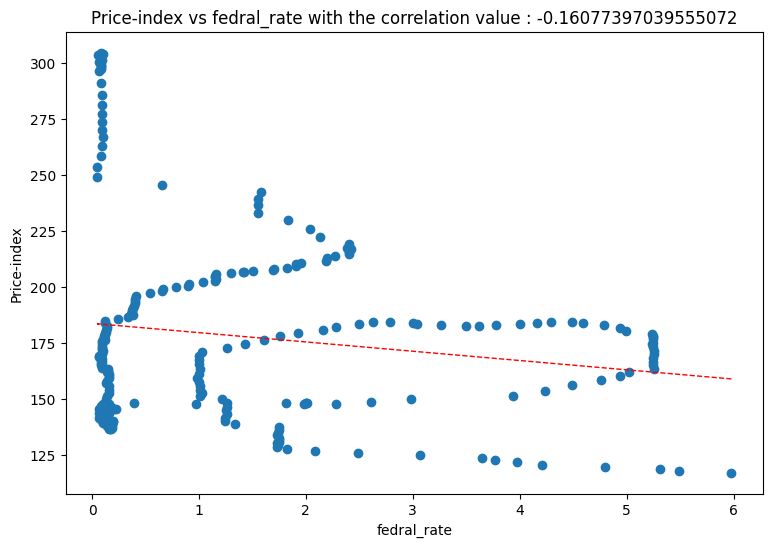

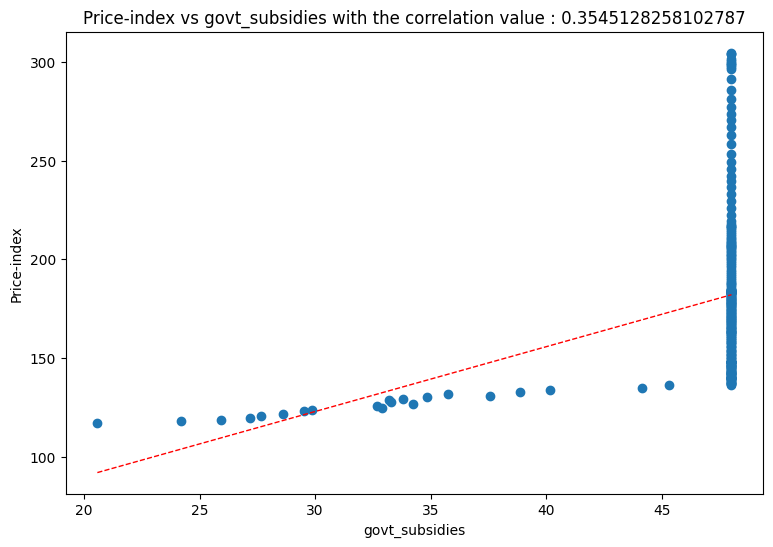

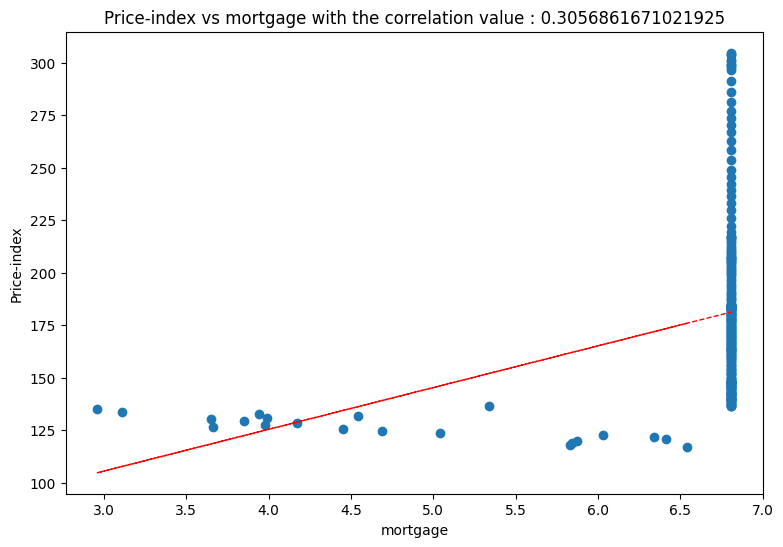

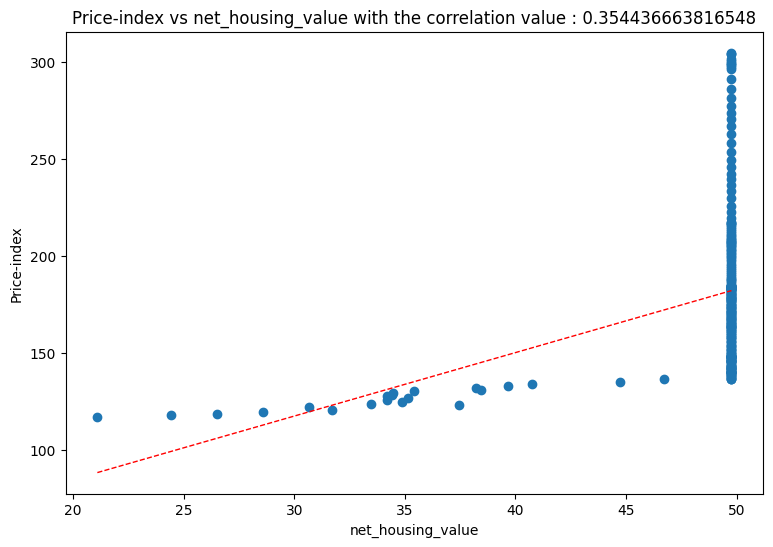

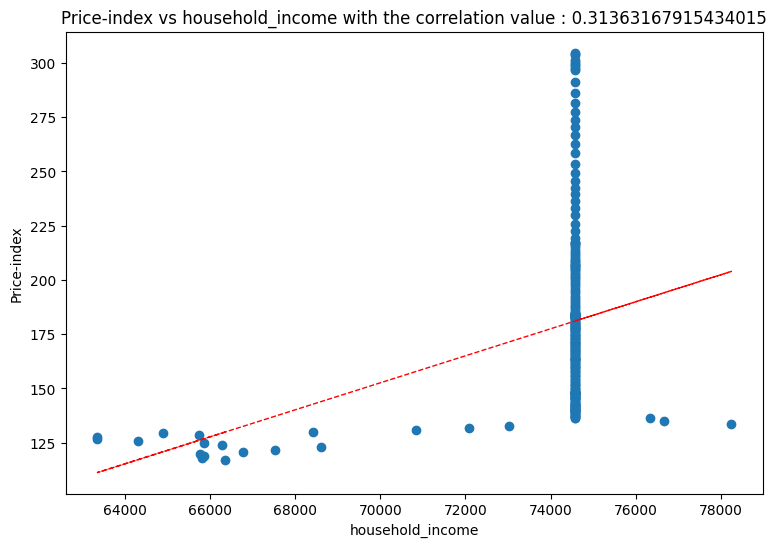

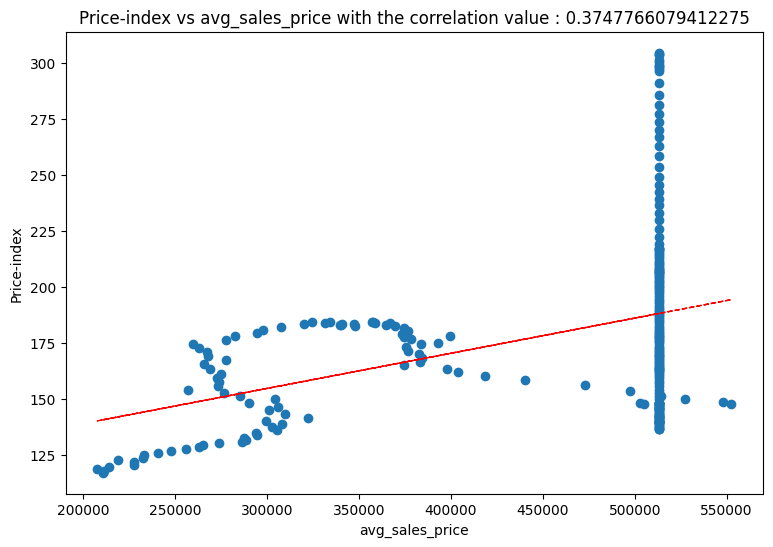

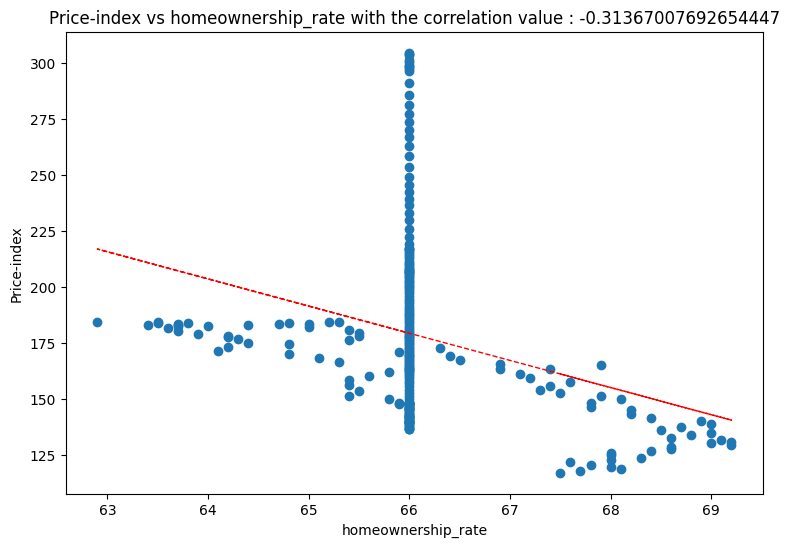

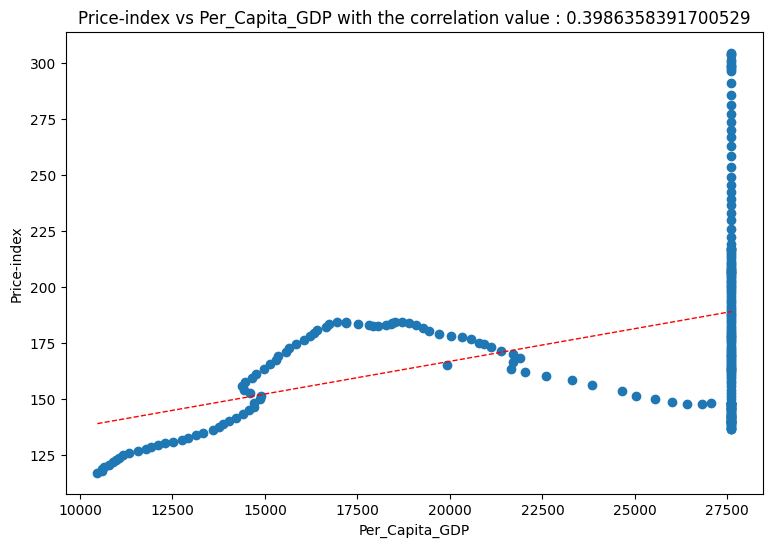

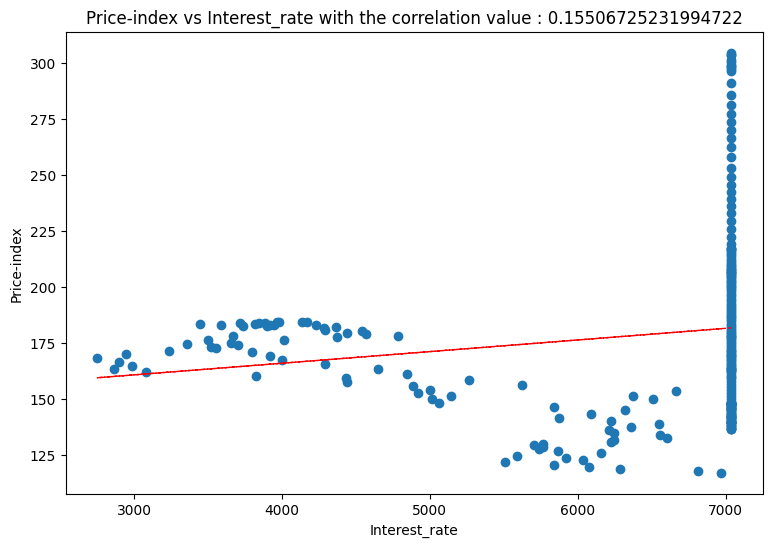

In [41]:
for col in numeric_col[1:]:
  fig = plt.figure(figsize=(9,6))
  ax = fig.gca()
  feature = df_hpi[col]
  correlation = feature.corr(df_hpi['Price-index'])
  plt.scatter(x=feature, y= df_hpi['Price-index'])
  plt.xlabel(col)
  plt.ylabel('Price-index')
  ax.set_title('Price-index vs '+col+ ' with the correlation value : '+str(correlation))
  z= np.polyfit(df_hpi[col],df_hpi['Price-index'],1)
  y_hat = np.poly1d(z)(df_hpi[col])
  plt.plot(df_hpi[col],y_hat,'r--',lw=1)

plt.show()

1. Why did you pick the specific chart?
To understand the correlation of the columns wrt the dependent variable

2. What is/are the insight(s) found from the chart?
From above scatter plot or Regression plot shows some numeric features has positive correlation with dependent variable and some has negative correlation

correlation of features with dependent feature :--

negative correlation = Homeownership rate, unemployment rate,fedral rate, monthly new house columns

<Axes: >

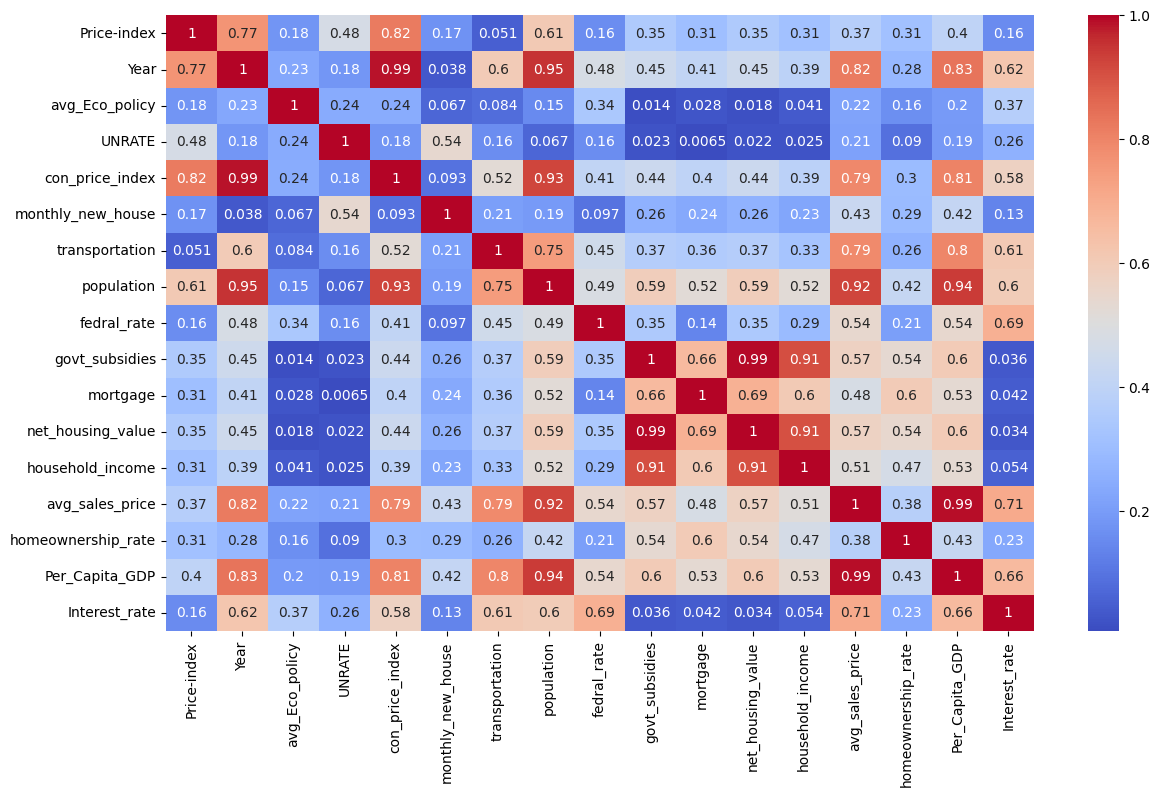

In [42]:
plt.figure(figsize=(14,8))
sns.heatmap(abs(df_hpi.corr()), cmap='coolwarm', annot=True)


###Multicolinearity variables (using VIF method to deal with them)

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)


calc_vif(df_hpi[[i for i in df_hpi.describe().columns if i not in ['Price-index','Population','Year','govt_subsidies']]])

variables           VIF
0       avg_Eco_policy      6.793019
1               UNRATE     25.763284
2      con_price_index    814.982776
3    monthly_new_house     44.289143
4       transportation    660.307093
5           population  24364.977635
6          fedral_rate     13.537475
7             mortgage    298.560811
8    net_housing_value   1456.917729
9     household_income   6766.600274
10     avg_sales_price   2806.270828
11  homeownership_rate  12437.152303
12      Per_Capita_GDP   3618.746514
13       Interest_rate    353.528865

In [44]:
df_hpi.drop(columns='population',inplace=True)
df_hpi.drop(columns='Year',inplace=True)
df_hpi.drop(columns='govt_subsidies',inplace=True)

In [45]:
df_hpi.shape

(252, 14)

<Axes: >

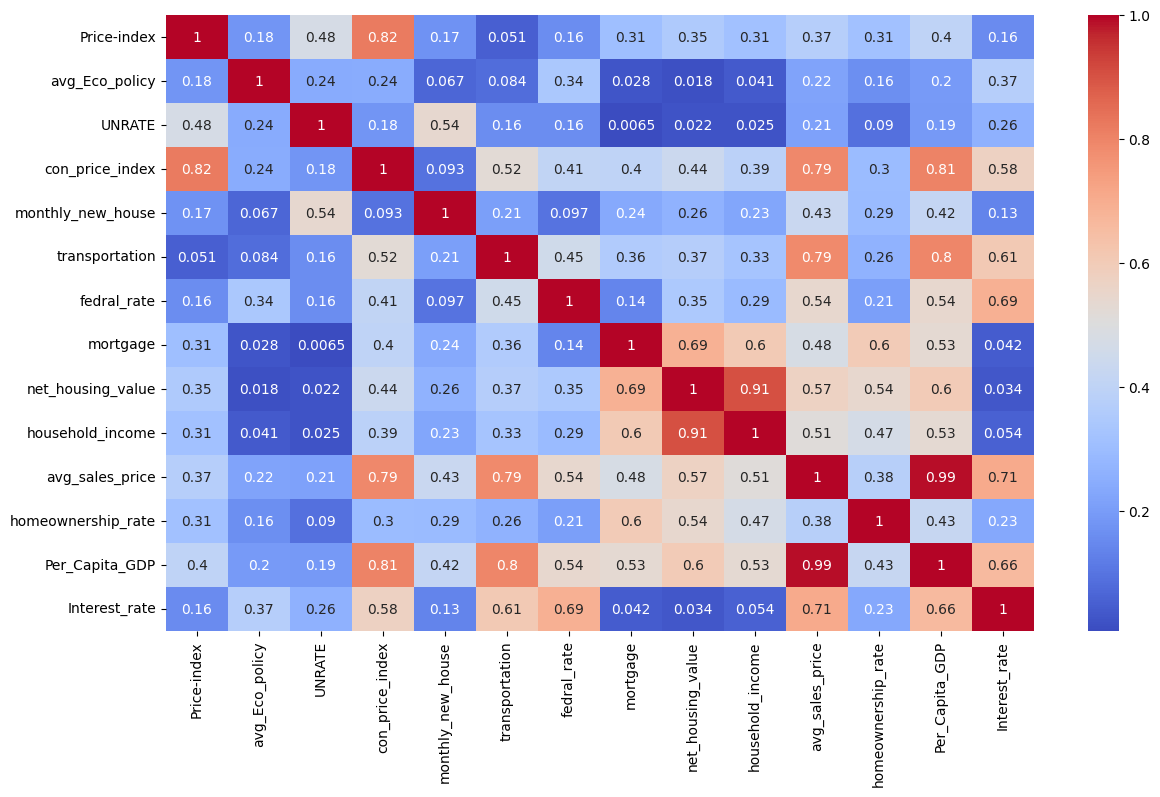

In [46]:
plt.figure(figsize=(14,8))
sns.heatmap(abs(df_hpi.corr()), cmap='coolwarm', annot=True)

#Model Building

In [47]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ridge_regression
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder

In [48]:
x= df_hpi.drop(columns=['Price-index'])

y=np.sqrt(df_hpi['Price-index'])


xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=10)


xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((201, 13), (51, 13), (201,), (51,))

##Function to different algorithms

In [49]:


# Appending all models parameters to the corrosponding list
mean_absolut_error = []
mean_sq_error=[]
root_mean_sq_error=[]
training_score =[]
r2_list=[]
adj_r2_list=[]
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


def score_metrix (model,X_train,X_test,Y_train,Y_test):

  '''
    train the model and gives mae, mse,rmse,r2,adj r2 score of the model

  '''
  #training the model
  model.fit(X_train,Y_train)

  # Training Score
  training  = model.score(X_train,Y_train)
  print("Training score  =", training)

  try:
      # finding the best parameters of the model if any
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")
  except:
    pass


  #predicting the Test set and evaluting the models

  if model == LinearRegression() or model == Lasso() or model == Ridge():
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test**2,Y_pred**2)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test**2,Y_pred**2)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test**2,Y_pred**2)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test**2,Y_pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

  else:
    # for tree base models
    Y_pred = model.predict(X_test)

    #finding mean_absolute_error
    MAE  = mean_absolute_error(Y_test,Y_pred)
    print("MAE :" , MAE)

    #finding mean_squared_error
    MSE  = mean_squared_error(Y_test,Y_pred)
    print("MSE :" , MSE)

    #finding root mean squared error
    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)

    #finding the r2 score

    r2 = r2_score(Y_test,Y_pred)
    print("R2 :" ,r2)
    #finding the adjusted r2 score
    adj_r2=1-(1-r2_score(Y_test,Y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2,'\n')

    try:

      # ploting the graph of feature importance

       best = model.best_estimator_
       features = X_train.columns
       importances = best.feature_importances_
       indices = np.argsort(importances)[-5:]  # Selecting the top five most important features

       plt.figure(figsize=(10, 8))  # Adjust figure size as needed
       plt.title('Top 5 Feature Importance')
       plt.barh(range(len(indices)), importances[indices], color='red', align='center')
       plt.yticks(range(len(indices)), [features[i] for i in indices])
       plt.xlabel('Relative Importance')
       plt.show()

    except:
      pass

  # Here we appending the parameters for all models
  mean_absolut_error.append(MAE)
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  training_score.append(training)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  print('*'*80)
  # print the cofficient and intercept of which model have these parameters and else we just pass them
  try :
    print("coefficient \n",model.coef_)
    print('\n')
    print("Intercept  = " ,model.intercept_)
  except:
    pass
  print('\n')
  print('*'*20, 'ploting the graph of Actual and predicted only with 80 observation', '*'*20)

  # ploting the graph of Actual and predicted only with 80 observation for better visualisation which model have these parameters and else we just pass them
  try:
    # ploting the line graph of actual and predicted values
    plt.figure(figsize=(15,7))
    plt.plot((Y_pred)[:80])
    plt.plot((np.array(Y_test)[:80]))
    plt.legend(["Predicted","Actual"])
    plt.show()
  except:
    pass

1. Which Evaluation metrics did you consider for a positive business impact and why?

### **Interpretability**:

The R2 score provides a straightforward interpretation of the proportion of variance in the target variable explained by the model. It represents the model's ability to capture and explain the variation in the data. A higher R2 score indicates that the model can better predict the target variable, which is crucial for making informed business decisions.

###Stakeholder Communication:

The R2 score is a widely understood metric and can be easily communicated to stakeholders, including non-technical individuals. It allows you to explain the model's performance in a concise and intuitive manner, enabling effective communication of the value and effectiveness of the predictive model.

###Decision-making Support:

A high R2 score suggests that the model is capturing a significant amount of the underlying patterns and relationships in the data. This can provide valuable insights for decision-making processes within a business context.

###Model Comparison:

The R2 score facilitates the comparison of different regression models or variations of the same model. It allows you to assess the relative performance of different approaches or configurations and choose the one that provides the best predictive power.

#Linear Regression

Training score  = 0.9814159946392876
MAE : 0.1911054272938694
MSE : 0.06391860855202391
RMSE : 0.25282129766304084
R2 : 0.9754812807369609
Adjusted R2 :  0.9668665955904877 

********************************************************************************
coefficient 
 [-1.26466129e-04 -3.08060900e-02  7.17115026e-02  1.68439760e-02
 -7.09036414e-03 -2.18147915e-01  7.68389640e-02 -2.50844583e-03
  4.29160377e-05  8.74810854e-06 -3.54598436e-01 -3.50260098e-04
 -2.90592762e-04]


Intercept  =  25.465296926040054


******************** ploting the graph of Actual and predicted only with 80 observation ********************


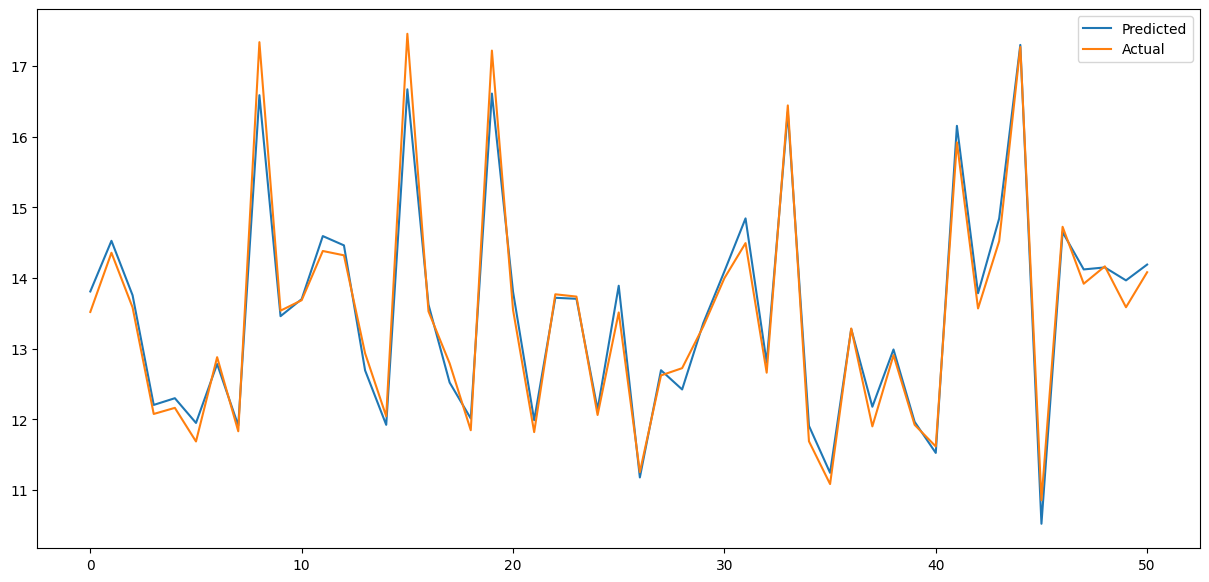

In [50]:
score_metrix (LinearRegression(),xtrain,xtest,ytrain,ytest)

## Ridge Regression

Training score  = 0.9707984132907334
The best parameters found out to be :{'alpha': 0.5} 
where model best score is:  0.9634008273996564 

MAE : 0.23841781408761256
MSE : 0.09409929281702767
RMSE : 0.30675608032609175
R2 : 0.9639041869700063
Adjusted R2 :  0.9512218742837923 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


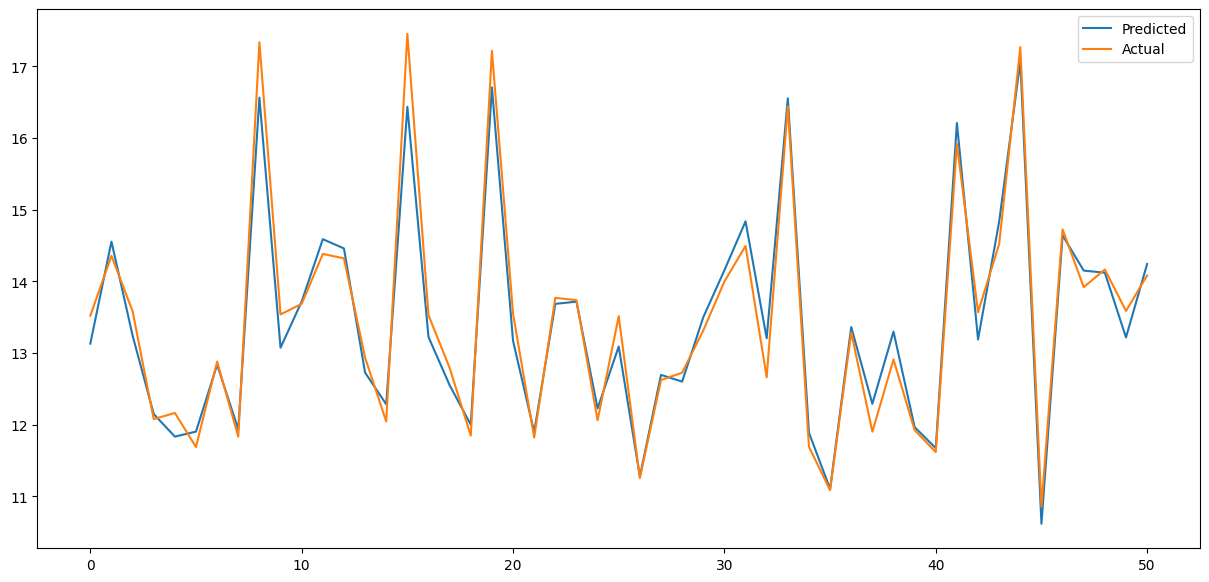

In [51]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
xtrain_trans = pt.fit_transform(xtrain)      # fit transform the training set
xtest_trans = pt.transform(xtest)

L2 = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100,0.5,1.5,1.6,1.7,1.8,1.9]}      # giving parameters
L2_cv = GridSearchCV(L2, parameters, scoring='r2', cv=5)                                                                    #using gridsearchcv and cross validate the model
score_metrix(L2_cv,xtrain_trans,xtest_trans,ytrain,ytest)

## Lasso Regression

Training score  = 0.9712787821742225
The best parameters found out to be :{'alpha': 0.0014} 
where model best score is:  0.964276336914684 

MAE : 0.2295813383104587
MSE : 0.08966781033841106
RMSE : 0.2994458387395141
R2 : 0.965604071827854
Adjusted R2 :  0.9535190159835865 

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


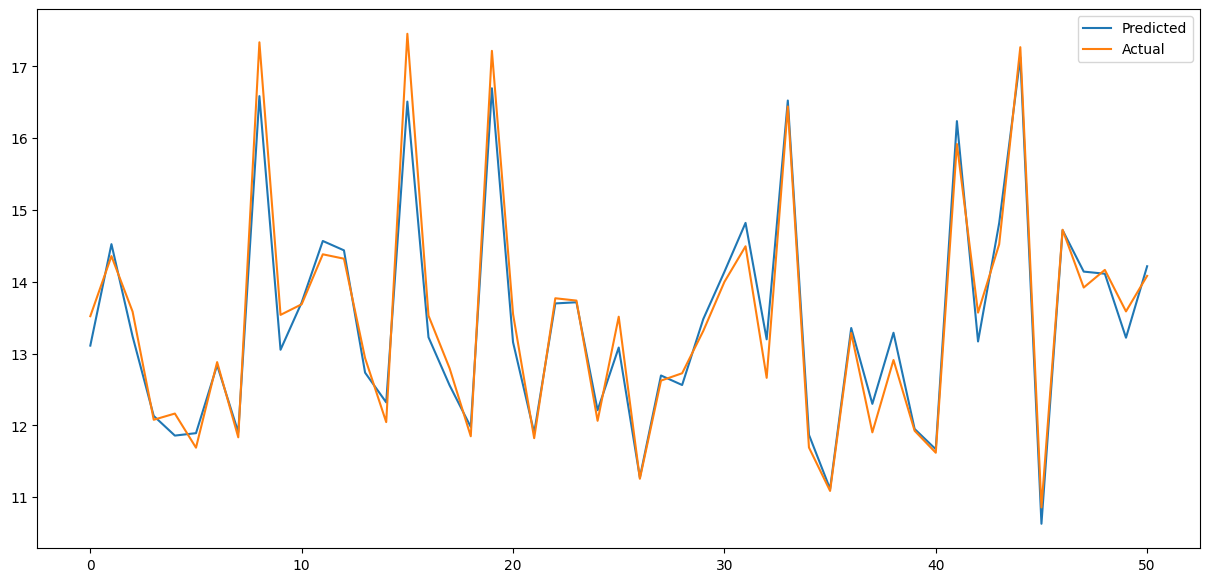

In [52]:
L1 = Lasso() #creating variable
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]} #lasso parameters
lasso_cv = GridSearchCV(L1, parameters, cv=5) #using gridsearchcv and cross validate the model


score_metrix(lasso_cv,xtrain_trans,xtest_trans,ytrain,ytest)


##Random forest regression model

In [53]:
new_x=df_hpi.drop(columns='Price-index')
new_y=df_hpi['Price-index']


new_xtrain, new_xtest, new_ytrain, new_ytest = train_test_split(new_x, new_y, test_size= 0.20, random_state = 10)


new_xtrain.shape,   new_xtest.shape,   new_ytrain.shape,  new_ytest.shape


((201, 13), (51, 13), (201,), (51,))

In [54]:
from sklearn.ensemble import RandomForestRegressor


# parameters for random forest regression model

rf_param_grid ={"n_estimators":[50,100,150],                    ### we can put any values for parameters
              'max_depth' : [10,15,20,25,'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}


# Using grid search cv
Ranom_forest_Grid_search = GridSearchCV(RandomForestRegressor(),param_grid=rf_param_grid,n_jobs=-1,verbose=2)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Training score  = 0.9941133596452312
The best parameters found out to be :{'max_depth': 15, 'max_features': 35, 'min_samples_split': 10, 'n_estimators': 50} 
where model best score is:  0.9849162807968785 

MAE : 2.0277719321761647
MSE : 12.350679603553624
RMSE : 3.5143533691923503
R2 : 0.9941298798473811
Adjusted R2 :  0.9920674051991637 



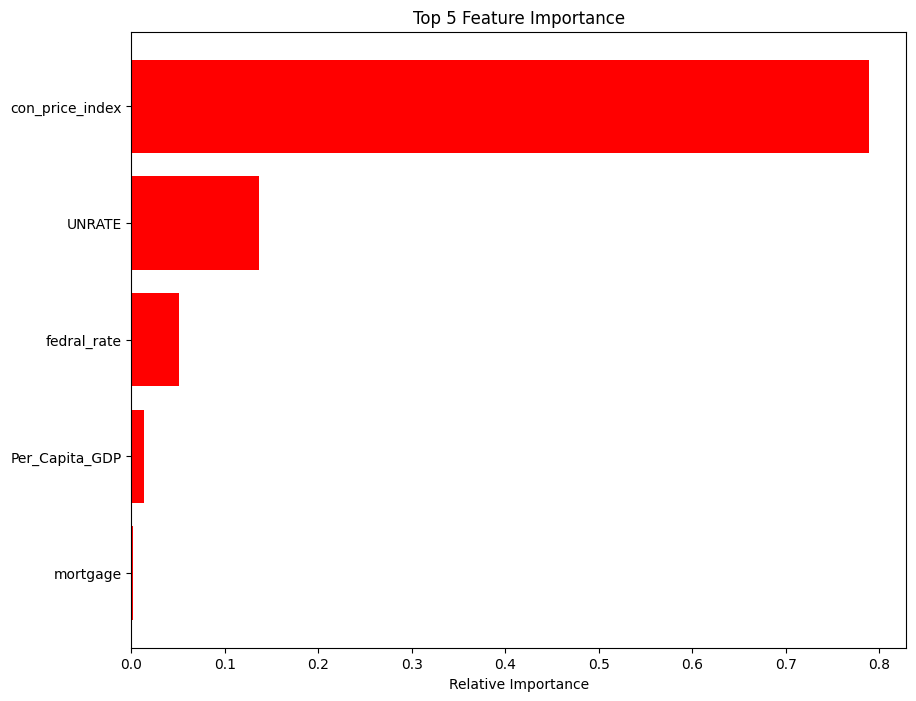

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


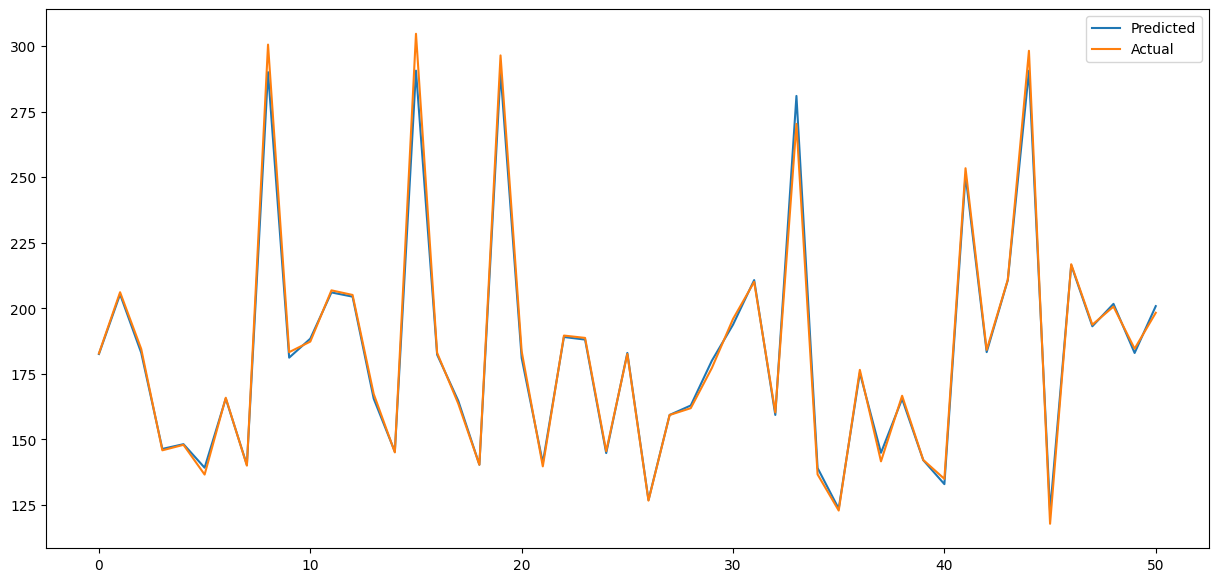

In [55]:
score_metrix(Ranom_forest_Grid_search, new_xtrain, new_xtest, new_ytrain, new_ytest)

##Decission Tree Regressor model

Training score  = 0.9949626444291627
The best parameters found out to be :{'criterion': 'squared_error', 'max_depth': 10, 'max_features': 35, 'min_samples_split': 10, 'splitter': 'best'} 
where model best score is:  0.969225155202497 

MAE : 2.0680066993464052
MSE : 9.867824908018392
RMSE : 3.141309425704254
R2 : 0.9953099489490111
Adjusted R2 :  0.9936620931743394 



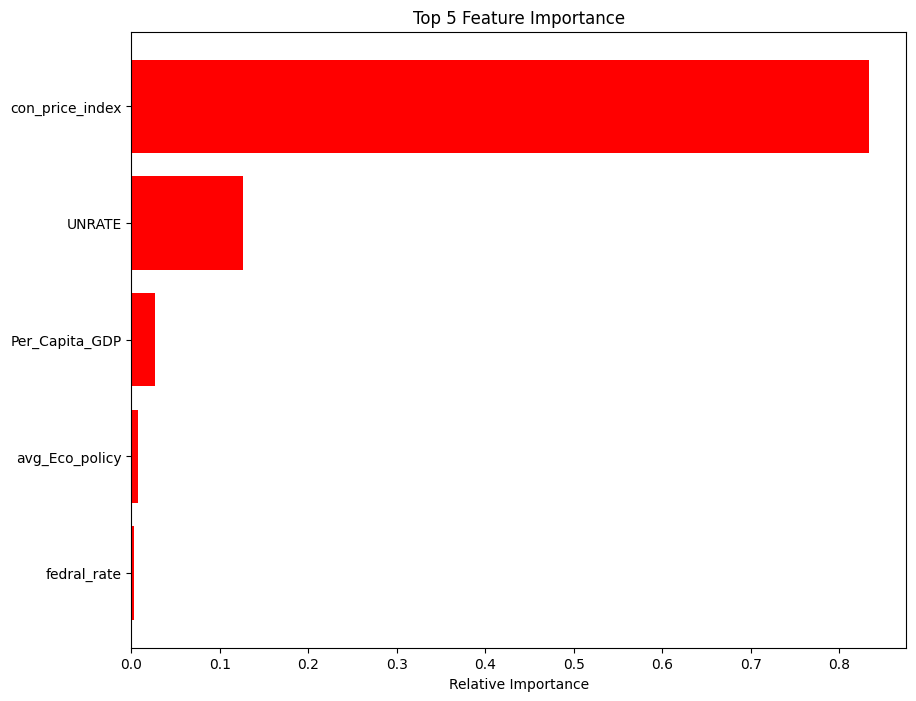

********************************************************************************


******************** ploting the graph of Actual and predicted only with 80 observation ********************


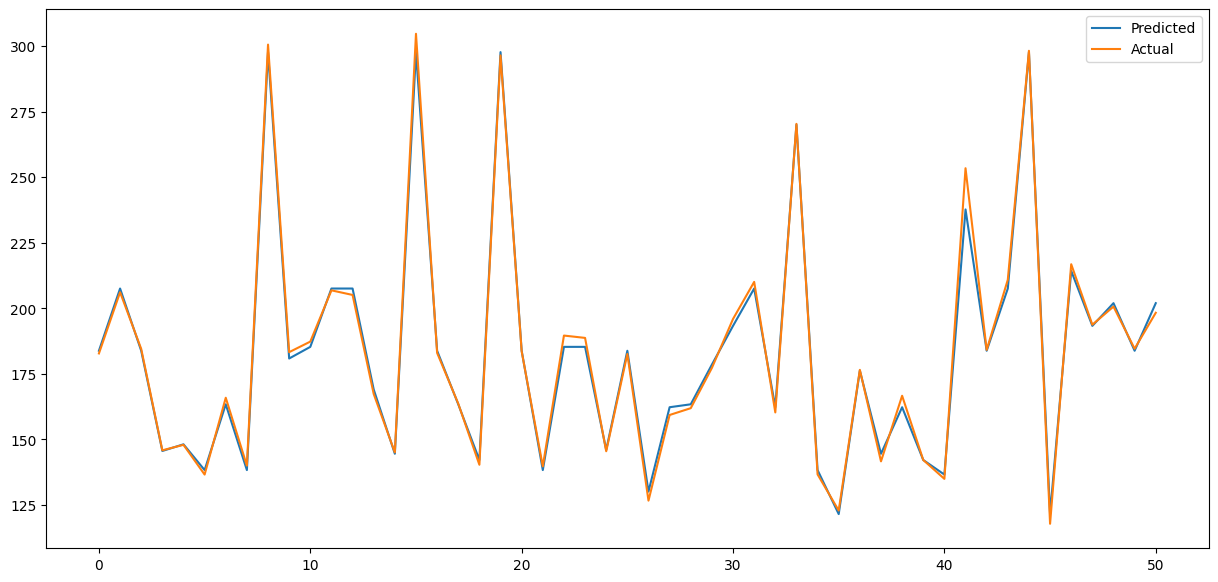

In [56]:
from sklearn.tree import DecisionTreeRegressor


# Parameters for Decission Tree model
param_grid = {'criterion' : ["squared_error"],
              'splitter' : ["best", "random"],
              'max_depth' : [10,15,25, 'none'],
              'min_samples_split': [10,50,100],
              'max_features' :[24,35,40,49]}

# Gridsearch CV
Dt_grid_search = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid,cv=2,n_jobs=-1)


score_metrix(Dt_grid_search,new_xtrain,new_xtest,new_ytrain,new_ytest)

###Conclusion

**If simplicity and interpretability** are important, linear models like Linear Regression, Ridge, or Lasso might be favorable.

If **predictive accuracy** is the priority and interpretability is less critical, Random Forest or Decision Tree might be considered.

**Regularization (Ridge/Lasso)** helps when you suspect overfitting.

The balance between bias and variance needs consideration. Linear models have lower variance but might have higher bias compared to ensemble methods like Random Forest.

Considering the overall balance between the given metrics, Ridge or Lasso Regression might be suitable as they offer a balance between good performance and regularization to mitigate overfitting.

###MODEL EXPLAINABILITY

In [57]:
model1=LinearRegression()


In [58]:
model1.fit(xtrain,ytrain)

LinearRegression()

In [59]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.3 MB/s eta 0:00:00


In [60]:
import shap
explainer = shap.KernelExplainer(model1.predict, xtrain)

In [61]:
shap_values = explainer.shap_values(xtest)

  0%|          | 0/51 [00:00<?, ?it/s]

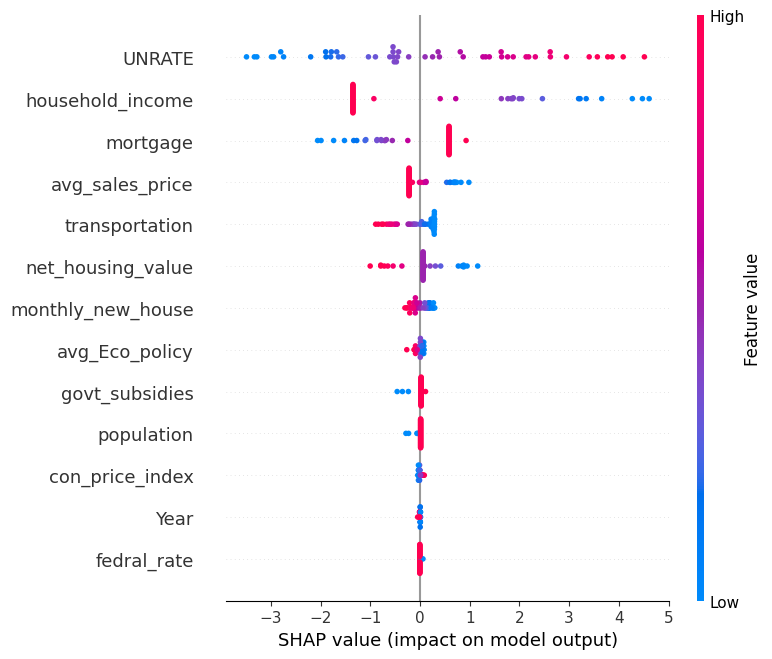

In [62]:
shap.summary_plot(shap_values, xtest,feature_names=numeric_col[1:])


In [63]:
import pickle

In [65]:
# Saving model into pickle file for deployement process
pickle.dump(model1, open('model.pkl', 'wb'))



In the exploration of U.S. home price prediction spanning two decades, multiple regression models were deployed, including linear regression, Lasso and Ridge regularization, Random Forest Regressor, and Decision Tree Regressor. These models underwent a thorough evaluation based on diverse metrics.

Among the various models examined, Lasso regularization emerged as a standout performer in predicting U.S. home prices. Its consistent and robust performance underscores its ability to capture intricate patterns within the dataset effectively.

Additionally, the application of the SHAP (SHapley Additive exPlanations) tool for model interpretability illuminated the influential factors impacting U.S. home prices. This tool provided invaluable insights into understanding the factors that significantly influence the housing market.

An interesting revelation from this comprehensive analysis was the identification of certain features that hold minimal or negligible impact on U.S. home prices. This nuanced understanding of influential factors, coupled with the selection of the most accurate model, holds immense potential to guide informed decision-making processes within the dynamic landscape of real estate.